<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Building-a-entangled-stated-from-stcratch" data-toc-modified-id="Building-a-entangled-stated-from-stcratch-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Building a entangled stated from stcratch</a></span></li><li><span><a href="#Simulating-a-theoretical-circuit" data-toc-modified-id="Simulating-a-theoretical-circuit-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Simulating a theoretical circuit</a></span></li><li><span><a href="#Simulating-a-real-circuit" data-toc-modified-id="Simulating-a-real-circuit-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Simulating a real circuit</a></span></li><li><span><a href="#Runing-the-circuit-on-a-real-Quantum-Computer" data-toc-modified-id="Runing-the-circuit-on-a-real-Quantum-Computer-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Runing the circuit on a real Quantum Computer</a></span></li></ul></li></ul></div>

In [1]:
from qiskit.tools.jupyter import *
%qiskit_version_table

In [2]:
%matplotlib inline
import qiskit as Qsk
import numpy as np
import matplotlib.pyplot as plt

# Introduction

## Building a entangled stated from stcratch

We want to build a Bell State from a state that is $\left| 00 \right>$, the final state is:

\begin{equation}
    \left| \psi \right> = \frac{\left| 00 \right> + \left| 11 \right>}{\sqrt 2}
\end{equation}

------------------------------
Observation: (Taken from qiskit website)

When representing the state of a multi-qubit system, the tensor order used in Qiskit is different than that used in most physics textbooks. Suppose there are $n$ qubits, and qubit $j$ is labeled as $Q_{j}$. Qiskit uses an ordering in which the $n^{\mathrm{th}}$ qubit is on the left side of the tensor product, so that the basis vectors are labeled as $Q_n\otimes \cdots  \otimes  Q_1\otimes Q_0$. For example, if qubit zero is in state 0, qubit 1 is in state 0, and qubit 2 is in state 1, Qiskit would represent this state as $|100\rangle$, whereas many physics textbooks would represent it as $|001\rangle$. 

------------------------------
The gates that we will use are:

- Hadamard: This is an one qubit gate that is represented on the computational basis by:

\begin{equation}
H = \frac{1}{\sqrt2}
 \begin{pmatrix} 
1 & 1\\
1 & -1 \\
\end{pmatrix}
\end{equation}

- $C_x$(Controlled X): This is a two qubit gate that changes the second qubit if the first qubit is on the state $\left| 1 \right>$. On the computational basis is represented by:

\begin{equation}
C_x = 
 \begin{pmatrix} 
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
\end{pmatrix}
\end{equation}


In [3]:
circ = Qsk.QuantumCircuit(2)

Adding gates

In [4]:
circ.h(0); #Add Hadamard on 0
circ.cx(0, 1); #Add CNOT on 0 and 1

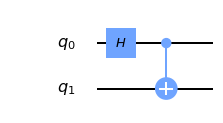

In [5]:
circ.draw(output='mpl')

## Simulating a theoretical circuit

For a simulation, we wil use `qiskit.Aer`.

First we choose a backend that will run the circuit.

In [6]:
backend = Qsk.Aer.get_backend('statevector_simulator')

After choosing the backend we submit a job for this backend with the `execute` command

In [7]:
job = Qsk.execute(circ, backend)

After the job is done, you acces the result

In [8]:
result = job.result()

You can print your output state after your circuit

In [9]:
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j]


Or you can visualize the density matrix of the result ofyour circuit

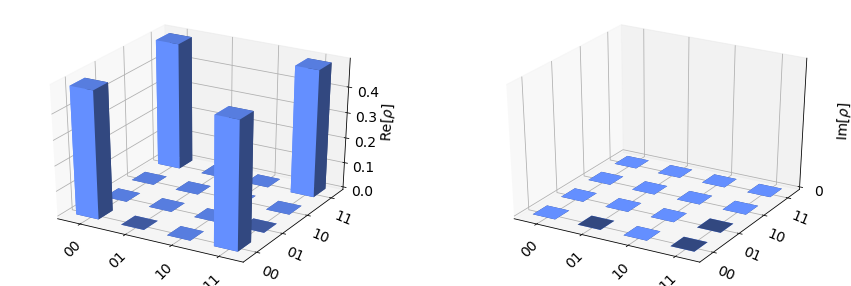

In [10]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

## Simulating a real circuit

The previous simulation is a theoretical realization of our circuit, but when you are working with a real quantum computer you have to measure your qubits in order to get your results. This will cause the qubits to colapse to bits and we can acces them.

So in order to do measurements we will have to change our previous circuit.

In [11]:
circ_meas = Qsk.QuantumCircuit(2, 2)

Construct a barrier between the measurements and you unitary transformations

In [12]:
circ_meas.barrier(range(2));

Map your quantum measurement to your classical bits

In [13]:
circ_meas.measure(range(2),range(2));

Append your measurement circuit to your unitary transformations

In [14]:
final_circ = circ+circ_meas

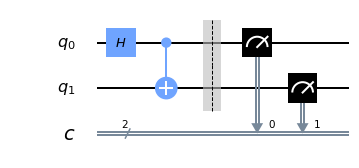

In [15]:
final_circ.draw(output='mpl')

Now we can simulate a real quantum computer using `qasm_simulator`.

In [16]:
backend_sim = Qsk.Aer.get_backend('qasm_simulator')

Now we have to choose how many times we will do this circuit, that is called "shots"

In [17]:
job_sim = Qsk.execute(final_circ, backend_sim, shots=1024)
result_sim = job_sim.result()

Now we can see how many shots arived on each state

In [18]:
counts = result_sim.get_counts(final_circ)
print(counts)

{'00': 515, '11': 509}


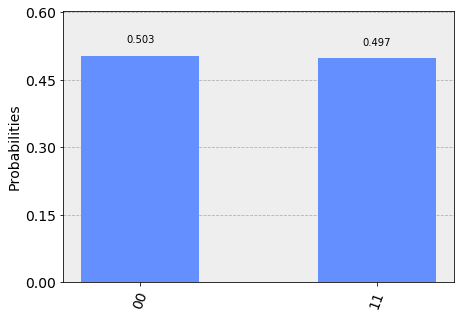

In [19]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

Therefore, we have approximately 50% shots on each state. This is exactly what we expected for the bell state.

## Runing the circuit on a real Quantum Computer

In order to acces the IBM Q, you will need to [register](https://quantum-computing.ibm.com/) and copy the Token from you profile. Here the token is on a `.txt` file in order to the token remain private on the code.

You only need to register your account on your computer once using `save_account`, after this you can get acces your account using`load_account`

In [20]:
from qiskit import IBMQ
token = np.loadtxt("Token.txt", unpack=True, dtype=str)
IBMQ.save_account(token, overwrite=True)

In [21]:
IBMQ.load_account();

In [22]:
provider = IBMQ.get_provider(group='open')

This is the list of chips that you have acces and their status

In [23]:
def Print_status():
    """Print the status of each  IBM Q backend.
    This function was made originaly by 
    Leonardo Cirto.
    
    OUTPUT
    ---------------------------------
    NAME : 
    STATUS:
        backend_name    
        backend_version 
        status_msg      
        pending_jobs    
        operational     
    """
    provider = IBMQ.get_provider(group='open')
    backend_list = provider.backends()
    for BACKEND in backend_list:
        print(' NAME :', BACKEND)
        STATUS = BACKEND.status()
        print(' STATUS:' )
        print('    backend_name    =',  STATUS.backend_name )
        print('    backend_version =',  STATUS.backend_version )
        print('    status_msg      =',  STATUS.status_msg )
        print('    pending_jobs    =',  STATUS.pending_jobs )
        print('    operational     =',  STATUS.operational  )

In [24]:
Print_status()

 NAME : ibmq_qasm_simulator
 STATUS:
    backend_name    = ibmq_qasm_simulator
    backend_version = 0.0.0
    status_msg      = active
    pending_jobs    = 3
    operational     = True
 NAME : ibmqx2
 STATUS:
    backend_name    = ibmqx2
    backend_version = 2.0.0
    status_msg      = active
    pending_jobs    = 3
    operational     = True
 NAME : ibmq_16_melbourne
 STATUS:
    backend_name    = ibmq_16_melbourne
    backend_version = 1.0.0
    status_msg      = active
    pending_jobs    = 29
    operational     = True
 NAME : ibmq_vigo
 STATUS:
    backend_name    = ibmq_vigo
    backend_version = 1.0.1
    status_msg      = active
    pending_jobs    = 4
    operational     = True
 NAME : ibmq_ourense
 STATUS:
    backend_name    = ibmq_ourense
    backend_version = 1.0.1
    status_msg      = active
    pending_jobs    = 11
    operational     = True
 NAME : ibmq_london
 STATUS:
    backend_name    = ibmq_london
    backend_version = 1.0.0
    status_msg      = active
    pen

Or use the following magic function

In [25]:
%qiskit_backend_overview

Then you choose one of those backends

In [26]:
backend = provider.get_backend('ibmqx2')

Now we submit our job for the IBM Q platform, and monitor it by using the function `job_monitor`

In [27]:
from qiskit.tools.monitor import job_monitor

job_exp = Qsk.execute(final_circ, backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run


In [28]:
result_exp = job_exp.result()

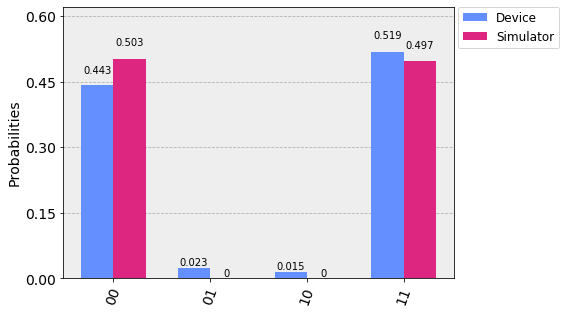

In [29]:
from qiskit.visualization import plot_histogram
counts_exp = result_exp.get_counts(final_circ)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

If you want to retrieve older jobs after closing your code you need your job_id

In [30]:
job_id = job_exp.job_id()

print('JOB ID: {}'.format(job_id))

JOB ID: 5dc76e2337831000121eef9a


To acces your old job, you need to be in the same backend

In [31]:
retrieved_job = backend.retrieve_job(job_id)

In [32]:
retrieved_job.result().get_counts(final_circ)

{'01': 24, '00': 454, '11': 531, '10': 15}